In [1]:
#Load the dataset and explore the variables.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('customer_churn.csv')

In [2]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
data = data[['Churn','tenure','SeniorCitizen','MonthlyCharges']]

In [5]:
data


,Churn,tenure,SeniorCitizen,MonthlyCharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70
...,...,...,...,...
7038,No,24,0,84.80
7039,No,72,0,103.20
7040,No,11,0,29.60
7041,Yes,4,1,74.40


In [6]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['churn', 'tenure', 'seniorcitizen', 'monthlycharges'], dtype='object')

In [7]:
data.describe()

,tenure,seniorcitizen,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


In [8]:
data.isna().sum()
nulls_data = pd.DataFrame(round(data.isna().sum()/len(data)*100,2))
nulls_data

,0
churn,0.0
tenure,0.0
seniorcitizen,0.0
monthlycharges,0.0


In [9]:
data.dtypes

churn              object
tenure              int64
seniorcitizen       int64
monthlycharges    float64
dtype: object

In [10]:
#checking inblanced
data['seniorcitizen'].value_counts() 
data.seniorcitizen.value_counts(normalize = True)

0    0.837853
1    0.162147
Name: seniorcitizen, dtype: float64

In [11]:
#checking inblanced
data['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [12]:
data['seniorcitizen'] = data['seniorcitizen'].astype('object')
data['churn'] = data['churn'].astype('object')

/var/folders/76/00lbr5fj2gs70r2y8qtskxk00000gn/T/ipykernel_49020/2805397589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seniorcitizen'] = data['seniorcitizen'].astype('object')
/var/folders/76/00lbr5fj2gs70r2y8qtskxk00000gn/T/ipykernel_49020/2805397589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['churn'] = data['churn'].astype('object')


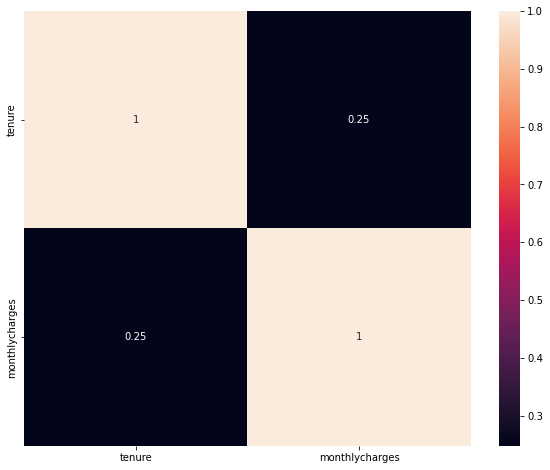

In [13]:
# heatmap of regression data
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


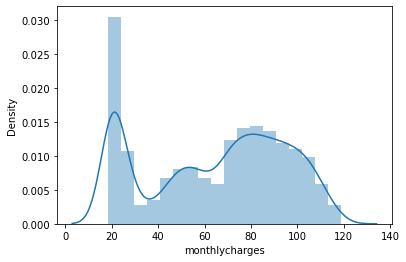

In [14]:
sns.distplot(data['monthlycharges'])
plt.show()



/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


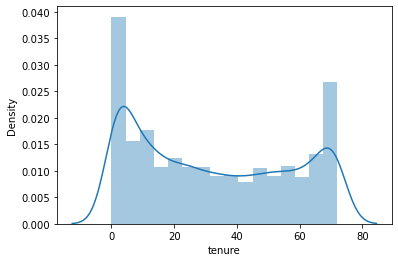

In [15]:
sns.distplot(data['tenure'])
plt.show()

In [16]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler
import numpy as np
X = data.select_dtypes(include = np.number)

# Normalizing data
transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


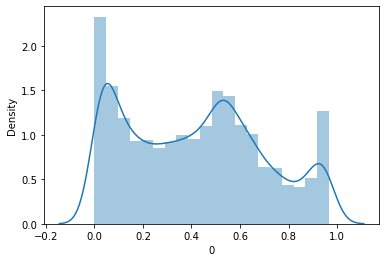

In [17]:
sns.distplot(x[0])
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


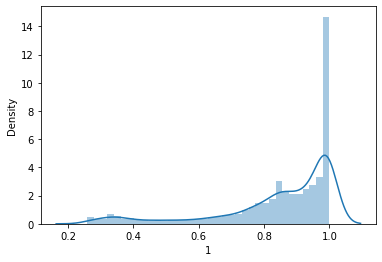

In [18]:
sns.distplot(x[1])
plt.show()

In [19]:
cat = data.select_dtypes(include = np.object)
cat = cat.drop(['churn'], axis=1)
categorical = pd.get_dummies(cat, columns=['seniorcitizen'])

/var/folders/76/00lbr5fj2gs70r2y8qtskxk00000gn/T/ipykernel_49020/3309430307.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = data.select_dtypes(include = np.object)


In [20]:
y = data['churn']
x = data[['tenure','monthlycharges']]
X = np.concatenate((x, categorical), axis=1)

In [21]:
categorical

,seniorcitizen_0,seniorcitizen_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7038,1,0
7039,1,0
7040,1,0
7041,0,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [77]:
##Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [78]:
##standard scaler transform the train and test dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
##run the model
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train, y_train)

In [80]:
##check the predict data
Y_train_perditct = classification.predict(X_train)
Y_test_perditct = classification.predict(X_test)


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


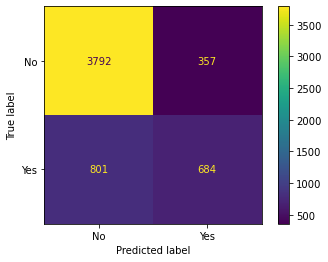

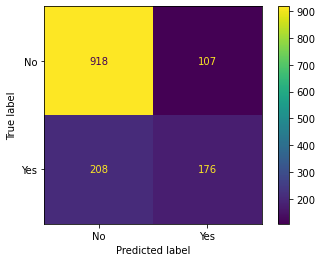

In [81]:
##to see the accurracy
plot_confusion_matrix(classification,X_train, y_train)
plot_confusion_matrix(classification,X_test, y_test)


In [82]:
classification.score(X_train, y_train)

0.7944621938232161

In [83]:
classification.score(X_test, y_test)

0.7764371894960965

In [84]:
## to see the performance of the model 
##if we have inblanced data, f1-score is good to use
print(classification_report(y_train, Y_train_perditct),classification_report(y_test, Y_test_perditct))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      4149
         Yes       0.66      0.46      0.54      1485

    accuracy                           0.79      5634
   macro avg       0.74      0.69      0.70      5634
weighted avg       0.78      0.79      0.78      5634
               precision    recall  f1-score   support

          No       0.82      0.90      0.85      1025
         Yes       0.62      0.46      0.53       384

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.76      0.78      0.76      1409



In [31]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [85]:
#under sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=10)
X_rus, Y_rus = rus.fit_resample(X_train,y_train)
Y_rus.value_counts()

No     1485
Yes    1485
Name: churn, dtype: int64

In [86]:
classification_random_under = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_rus, Y_rus)

In [87]:
classification_random_under.score(X_test, y_test)

0.7111426543647977

#-------------------

In [88]:
#under sampling using TomekLinks
t1 = TomekLinks()
X_under,Y_under = t1.fit_resample(X_train,y_train)
Y_under.value_counts()

No     3738
Yes    1485
Name: churn, dtype: int64

In [89]:
classification_tomeklinks = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_under,Y_under)

In [90]:
classification_tomeklinks.score(X_test, y_test)

0.765791341376863

#-------------------

In [97]:
##Over Sampling
#over sampling using RandomoverSampler
ros = RandomOverSampler(random_state=10)
X_rus, Y_rus = ros.fit_resample(X_train,y_train)
Y_rus.value_counts()

No     4149
Yes    4149
Name: churn, dtype: int64

In [98]:
classification_random_over = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_rus, Y_rus)

In [99]:
classification_random_over.score(X_test, y_test)

0.7083037615330021

#-------------------

In [100]:
##Over Sampling
#over sampling using SMOTE
sm = SMOTE(random_state = 42)
X_res, Y_res = sm.fit_resample(X_train,y_train)
Y_under.value_counts()

No     3738
Yes    1485
Name: churn, dtype: int64

In [101]:
classification_smote = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_res, Y_res)

In [102]:
classification_smote.score(X_test, y_test)

0.7083037615330021

##UnderSampling in general has a better performance than OverSampling with this model. 